In [3]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 7.0 MB/s eta 0:00:55
   ---------------------------------------- 0.5/385.0 MB 6.6 MB/s eta 0:00:59
   ---------------------------------------- 0.9/385.0 MB 7.3 MB/s eta 0:00:53
   ---------------------------------------- 1.3/385.0 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 1.7/385.0 MB 7.7 MB/s eta 0:00:50
   ---------------------------------------- 2.1/385.0 MB 7.9 MB/s eta 0:00:49
   ---------------------------------------- 2.6/385.0 MB 8.3 MB/s eta 0:00:47
   ---------------------------------------- 3.2/385.0 MB 8.8 MB/s eta 0:00:44
   ---------------------------------------- 3.8/385.0 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 4.4/385.0 MB 9.7 MB/s eta 0:00:

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd

In [7]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [16]:
X_train[0].shape

(28, 28)

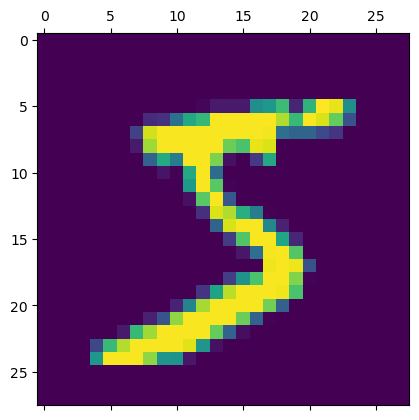

In [17]:
plt.matshow(X_train[0])

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test),28*28)

In [27]:
X_train_flat.shape

(60000, 784)

In [28]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
## Creating a neural network |

In [29]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)

C:\Users\Sri\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8071 - loss: 0.7353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9156 - loss: 0.3048
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9182 - loss: 0.2927
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9218 - loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9259 - loss: 0.2671


In [24]:
## Now scaling the above images b diving it by 255

In [30]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.3069


[0.26804783940315247, 0.925599992275238]

In [31]:
y_pred = model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
y_pred[0]

array([3.2561988e-02, 4.9125765e-07, 8.5016191e-02, 9.6190435e-01,
       2.5632486e-03, 1.4631951e-01, 2.5634083e-06, 9.9985397e-01,
       7.9260446e-02, 6.7569333e-01], dtype=float32)

In [34]:
## Returns index where value is max
np.argmax(y_pred[0])

7

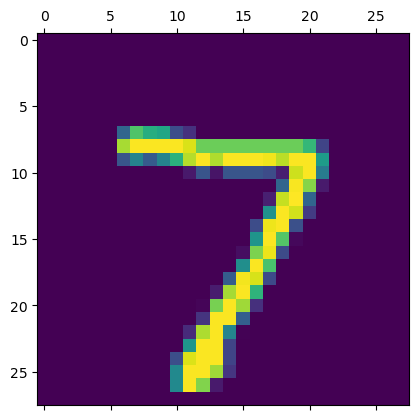

In [38]:
plt.matshow(X_test[0])

In [40]:
## Building confusion matrix 

In [41]:
y_pred1 = [np.argmax(i) for i in y_pred]

In [43]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

In [1]:
import seaborn as sn 

<Axes: >

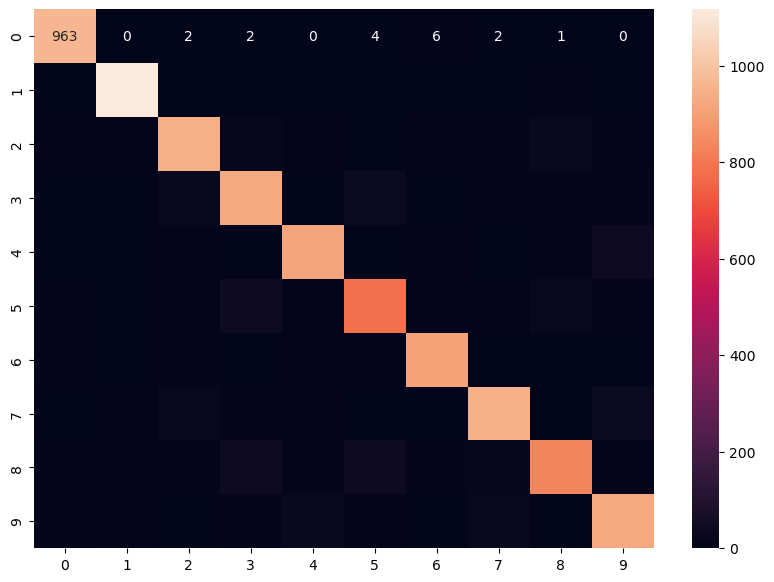

In [46]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')


In [47]:
## Adding hidden layers to neural network 

In [48]:
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),keras.layers.Dense(10,activation = 'sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)

C:\Users\Sri\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8739 - loss: 0.4480
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9620 - loss: 0.1308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9738 - loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0472


In [49]:
## We can flatten the layer directly without reshaping 

In [51]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(100,activation = 'relu'),keras.layers.Dense(10,activation = 'sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8738 - loss: 0.4442
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9615 - loss: 0.1343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9749 - loss: 0.0853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9805 - loss: 0.0643
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9839 - loss: 0.0511
